In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
df=pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df.shape

(23486, 11)

In [4]:
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

### EDA

In [5]:
df=df.drop(['Unnamed: 0','Clothing ID','Age','Title'],axis=1)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,23486.0,4.196032,1.110031,1.0,4.0,5.0,5.0,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.0,1.0,3.0,122.0


In [7]:
df.describe().T.drop("count",axis=1)

,mean,std,min,25%,50%,75%,max
Rating,4.196032,1.110031,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.822362,0.382216,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.535936,5.702202,0.0,0.0,1.0,3.0,122.0


In [8]:
df.describe(include='object').T.drop("count",axis=1)

,unique,top,freq
Review Text,22634,Perfect fit and i've gotten so many compliment...,3
Division Name,3,General,13850
Department Name,6,Tops,10468
Class Name,20,Dresses,6319


### ***Rating Disribution***

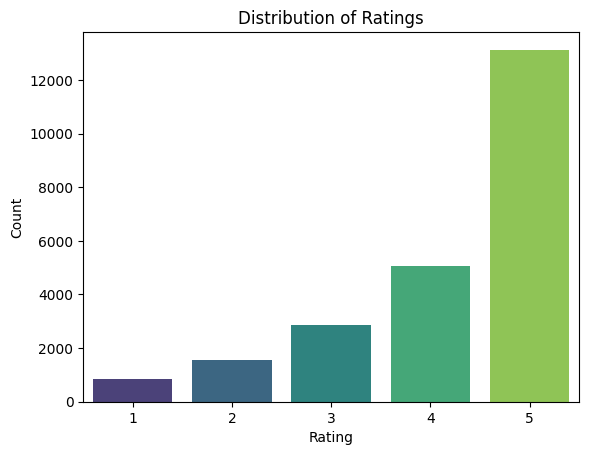

In [9]:
sns.countplot(data=df,x="Rating",palette="viridis")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

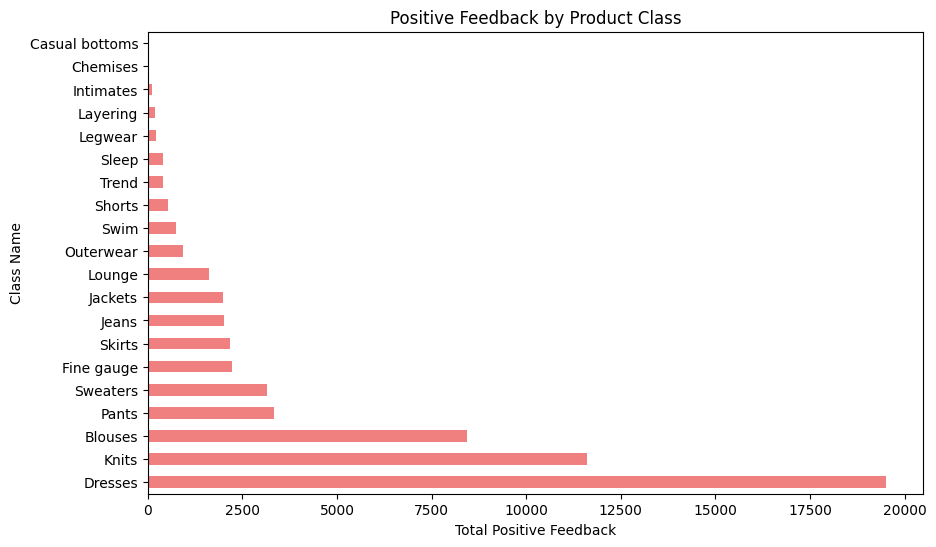

In [10]:
top_feedback = df.groupby("Class Name")["Positive Feedback Count"].sum().sort_values(ascending=False)
top_feedback.plot(kind="barh", color="lightcoral", figsize=(10, 6))
plt.title("Positive Feedback by Product Class")
plt.xlabel("Total Positive Feedback")
plt.ylabel("Class Name")
plt.show()


In [11]:
df.isna().sum()

Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [12]:
df=df.dropna()

In [13]:
df.shape

(22628, 7)

In [14]:
df.head()

,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Text preprecessing

In [15]:
clean_df=df.drop(['Positive Feedback Count','Division Name','Department Name','Class Name'],axis=1)
clean_df=clean_df.reset_index(drop=True)

In [16]:
clean_df

,Review Text,Rating,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,4,1
1,Love this dress! it's sooo pretty. i happene...,5,1
2,I had such high hopes for this dress and reall...,3,0
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,This shirt is very flattering to all due to th...,5,1
...,...,...,...
22623,I was very happy to snag this dress at such a ...,5,1
22624,"It reminds me of maternity clothes. soft, stre...",3,1
22625,"This fit well, but the top was very see throug...",3,0
22626,I bought this dress for a wedding i have this ...,3,1


In [17]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

from nltk.corpus import stopwords,wordnet
import string

In [18]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/wordnet2022.zip.


True

In [19]:
! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet # temp fix for lookup error.

In [20]:
# Load the English stopwords
stopword = set(stopwords.words('english'))

# Create a translation table to remove punctuation
translated_table = str.maketrans('', '', string.punctuation)

In [21]:
def preprocess_txt(data):
    text=data.lower()
    text=re.sub(r'\d+',"",text)
    # remove punctuations
    text=text.translate(translated_table)
    # word tokenization
    text_token=word_tokenize(text)
    # remove keywords
    filtered_words=[word for word in text_token if word not in stopword]

    lemmatizer=WordNetLemmatizer()
    lemma_words=[lemmatizer.lemmatize(w,pos='a')for w in filtered_words]
    
    return " ".join(lemma_words)

clean_df['Review Text']=clean_df['Review Text'].apply(lambda x:preprocess_txt(x))

clean_df.head()

,Review Text,Rating,Recommended IND
0,absolutely wonderful silky sexy comfortable,4,1
1,love dress sooo pretty happened find store im ...,5,1
2,high hopes dress really wanted work initially ...,3,0
3,love love love jumpsuit fun flirty fabulous ev...,5,1
4,shirt flattering due adjustable front tie perf...,5,1


## Split data

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_df['Review Text'], clean_df['Recommended IND'], test_size=0.2, random_state=42)

print(f"shape of X_train {X_train.shape}")
print(f"shape of y_train {y_train.shape}")
print(f"shape of X_test {X_test.shape}")
print(f"shape of y_test {y_test.shape}")

shape of X_train (18102,)
shape of y_train (18102,)
shape of X_test (4526,)
shape of y_test (4526,)


## TF-IDF (Term Frequency - Inverse Document Frequency):



In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer with n-grams
tfidf_vectorizer = TfidfVectorizer( ngram_range=(1, 3) , max_features=5000)

# Fit and transform the training data, and transform the test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")

Shape of X_train_tfidf: (18102, 5000)
Shape of X_test_tfidf: (4526, 5000)


## Naive bayes model

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


# Initialize Naive Bayes classifier and fit to training data
NB = MultinomialNB()
NB.fit(X_train_tfidf, y_train)
# Predict class labels for test data using Naive Bayes classifier
y_pred_nb = NB.predict(X_test_tfidf)

In [25]:
# Evaluate the Naive Bayes classifier
print("Evaluation of Naive Bayes Classifier:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")


Evaluation of Naive Bayes Classifier:
Confusion Matrix:
[[ 305  540]
 [  57 3624]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.36      0.51       845
           1       0.87      0.98      0.92      3681

    accuracy                           0.87      4526
   macro avg       0.86      0.67      0.71      4526
weighted avg       0.87      0.87      0.85      4526

Accuracy: 0.8681


## Logistic regression model

In [26]:
# Initialize Naive Bayes classifier and fit to training data
LG = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LG.fit(X_train_tfidf, y_train)
# Predict class labels for test data using Naive Bayes classifier
y_pred_LG = LG.predict(X_test_tfidf)

In [27]:
# Evaluate the Naive Bayes classifier
print("Evaluation of Naive Bayes Classifier:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_LG))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_LG))
print(f"Accuracy: {accuracy_score(y_test, y_pred_LG):.4f}")


Evaluation of Naive Bayes Classifier:
Confusion Matrix:
[[ 467  378]
 [ 131 3550]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.55      0.65       845
           1       0.90      0.96      0.93      3681

    accuracy                           0.89      4526
   macro avg       0.84      0.76      0.79      4526
weighted avg       0.88      0.89      0.88      4526

Accuracy: 0.8875


## DistilBERT transformers

In [28]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from datasets import Dataset
import tensorflow as tf

In [29]:
# Convert datasets to Hugging Face Dataset format
train_dataset = Dataset.from_dict({"text": X_train.tolist(), "label": y_train.tolist()})
test_dataset = Dataset.from_dict({"text": X_test.tolist(), "label": y_test.tolist()})

In [30]:
# Load the tokenizer
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [31]:
# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

# Apply tokenization
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/18102 [00:00<?, ? examples/s]

Map:   0%|          | 0/4526 [00:00<?, ? examples/s]

In [32]:
# Convert datasets to TensorFlow format
tf_train_dataset = train_dataset.to_tf_dataset(
    columns=["input_ids", "attention_mask"],
    label_cols=["label"],
    shuffle=True,
    batch_size=16,
)

tf_test_dataset = test_dataset.to_tf_dataset(
    columns=["input_ids", "attention_mask"],
    label_cols=["label"],
    shuffle=False,
    batch_size=16,
)

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:403: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [33]:
# Load the model
num_labels = len(y_train.unique())  # Number of unique classes
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [34]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# Train the model
history = model.fit(tf_train_dataset, validation_data=tf_test_dataset, epochs=5)

# Evaluate the model
results = model.evaluate(tf_test_dataset)
print("Evaluation Results:", results)


Epoch 1/5
1132/1132 [==============================] - 181s 142ms/step - loss: 0.2839 - accuracy: 0.8782 - val_loss: 0.2426 - val_accuracy: 0.8933
Epoch 2/5
1132/1132 [==============================] - 159s 141ms/step - loss: 0.1941 - accuracy: 0.9201 - val_loss: 0.2405 - val_accuracy: 0.8986
Epoch 3/5
1132/1132 [==============================] - 159s 141ms/step - loss: 0.1301 - accuracy: 0.9493 - val_loss: 0.2991 - val_accuracy: 0.8984
Epoch 4/5
1132/1132 [==============================] - 159s 141ms/step - loss: 0.0802 - accuracy: 0.9714 - val_loss: 0.3499 - val_accuracy: 0.8951
Epoch 5/5
283/283 [==============================] - 14s 48ms/step - loss: 0.4130 - accuracy: 0.8926
Evaluation Results: [0.41296762228012085, 0.8926204442977905]


283/283 [==============================] - 14s 46ms/step


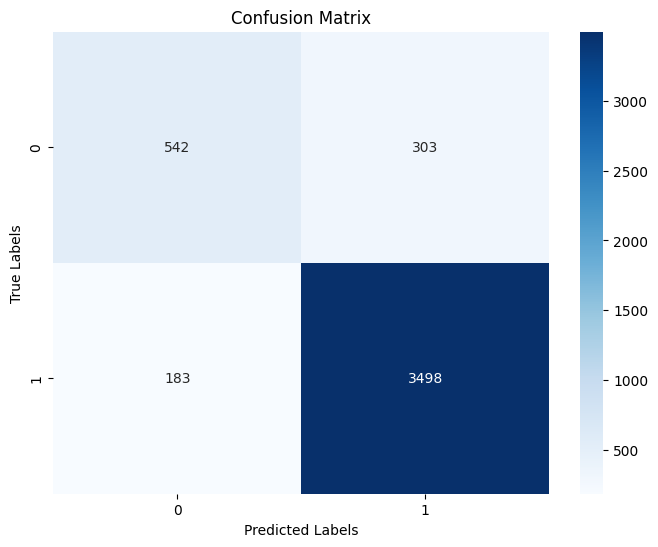

In [35]:
# Make predictions
y_pred_probs = model.predict(tf_test_dataset)  # Get probabilities (logits)
y_pred = np.argmax(y_pred_probs.logits, axis=-1)  # Convert to predicted labels

# Get true labels (from the test dataset)
y_true = np.array([example['label'] for example in test_dataset])

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [36]:
# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       845
           1       0.92      0.95      0.94      3681

    accuracy                           0.89      4526
   macro avg       0.83      0.80      0.81      4526
weighted avg       0.89      0.89      0.89      4526



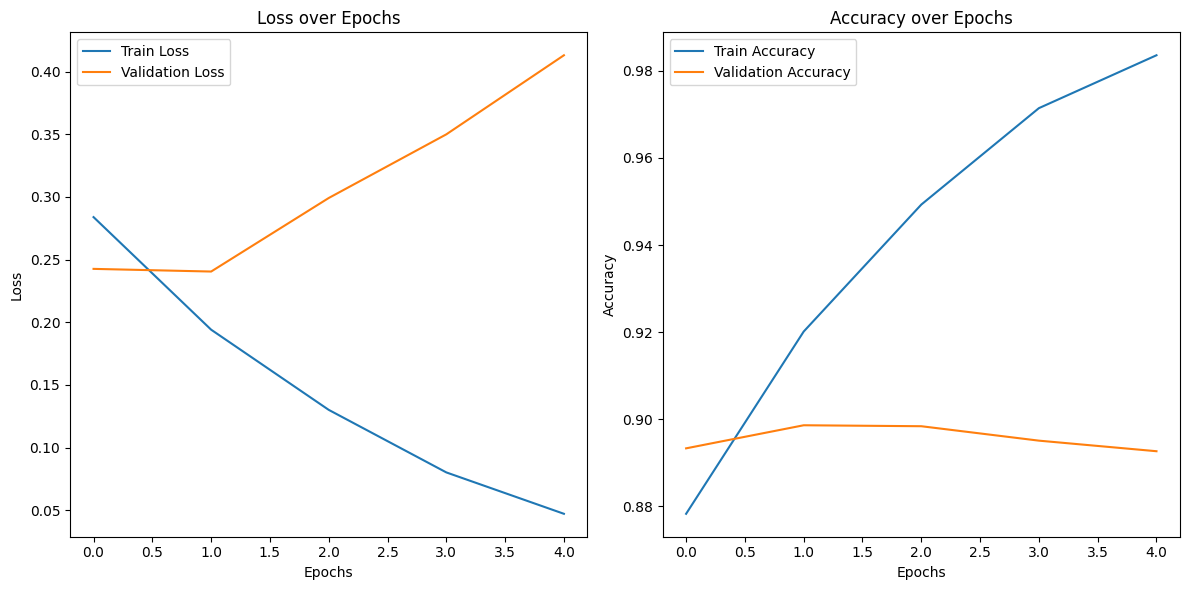

In [37]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [38]:
import numpy as np
from sklearn.metrics import accuracy_score
import tensorflow as tf

# Prediction function with user input
def predict_sentiment_with_accuracy(input_text, true_label, model, tokenizer, label_encoder=None):
    # Preprocess the input text
    inputs = tokenizer(input_text, padding="max_length", truncation=True, max_length=128, return_tensors="tf")
    
    # Make predictions
    logits = model.predict(inputs)  # Get logits (predicted probabilities)
    predicted_labels = np.argmax(logits.logits, axis=-1)  # Convert logits to predicted label

    # If label encoder is provided, reverse transform to get actual class labels
    if label_encoder:
        predicted_labels = label_encoder.inverse_transform(predicted_labels)
    
    # Calculate accuracy
    accuracy = accuracy_score([true_label], predicted_labels)

    # Return the predicted sentiment and accuracy
    return predicted_labels[0], accuracy

# Main function to take input from the user
def main():
    print("Welcome to Sentiment Prediction!")
    input_text = input("Please enter a sentence to analyze sentiment: ")
    
    # Get the true sentiment from the user for comparison (optional for evaluation)
    true_label = int(input("Enter the true sentiment label (0: Negative, 1: Positive, etc.): "))
    
    # Get predicted sentiment and accuracy
    predicted_sentiment, accuracy = predict_sentiment_with_accuracy(input_text, true_label, model, tokenizer)
    
    # Display the result
    print(f"Predicted Sentiment: {predicted_sentiment}")
    print(f"Accuracy: {accuracy * 100:.2f}%")

# Run the main function
if __name__ == "__main__":
    main()


Welcome to Sentiment Prediction!


Please enter a sentence to analyze sentiment:  I absolutely love this product, it works perfectly!
Enter the true sentiment label (0: Negative, 1: Positive, etc.):  1


1/1 [==============================] - 1s 1s/step
Predicted Sentiment: 1
Accuracy: 100.00%


# save model

In [40]:
# Save the model in TensorFlow's SavedModel format
model.save("sentiment_analysis_model", save_format="tf")